In [47]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt # plotting

import os # accessing directory structure
from sklearn.preprocessing import StandardScaler
# from mpl_toolkits.mplot3d import Axes3D

In [48]:
# Input data files are available in the read-only "../input/" directory

# dataset folder path
# print(os.listdir('../input/california-housing-priceanimations'))

myDF = pd.read_csv('/housing.csv')
myDF.dataframeName = 'housing.csv'


nRow, nCol = myDF.shape
print(f'There are {nRow} rows and {nCol} columns')


There are 20640 rows and 10 columns


In [49]:
myDF.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [50]:
# reomving null values since they are only 200 null values in total-bedrooms 
myDF.dropna(inplace = True)
myDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [51]:
#split data into test train
from sklearn.model_selection import train_test_split

x = myDF.drop(['median_house_value'], axis = 1) # axis = 1 for column
y = myDF['median_house_value']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

# **Data exploration**

In [52]:
train_data = x_train.join(y_train)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

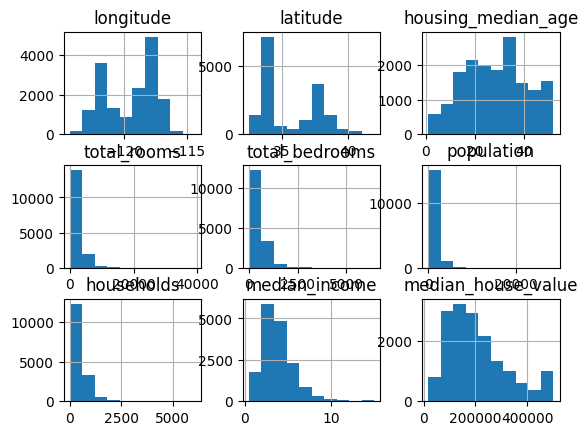

In [53]:
train_data.hist()

In [54]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot = True)

ValueError: could not convert string to float: '<1H OCEAN'

<Figure size 1500x800 with 0 Axes>

# Data preprocessing

In [55]:
# to normalize squwed data
train_data['total_rooms'] = np.log(train_data['total_rooms']+ 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms']+ 1)
train_data['population'] = np.log(train_data['population']+ 1)
train_data['households'] = np.log(train_data['households']+ 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

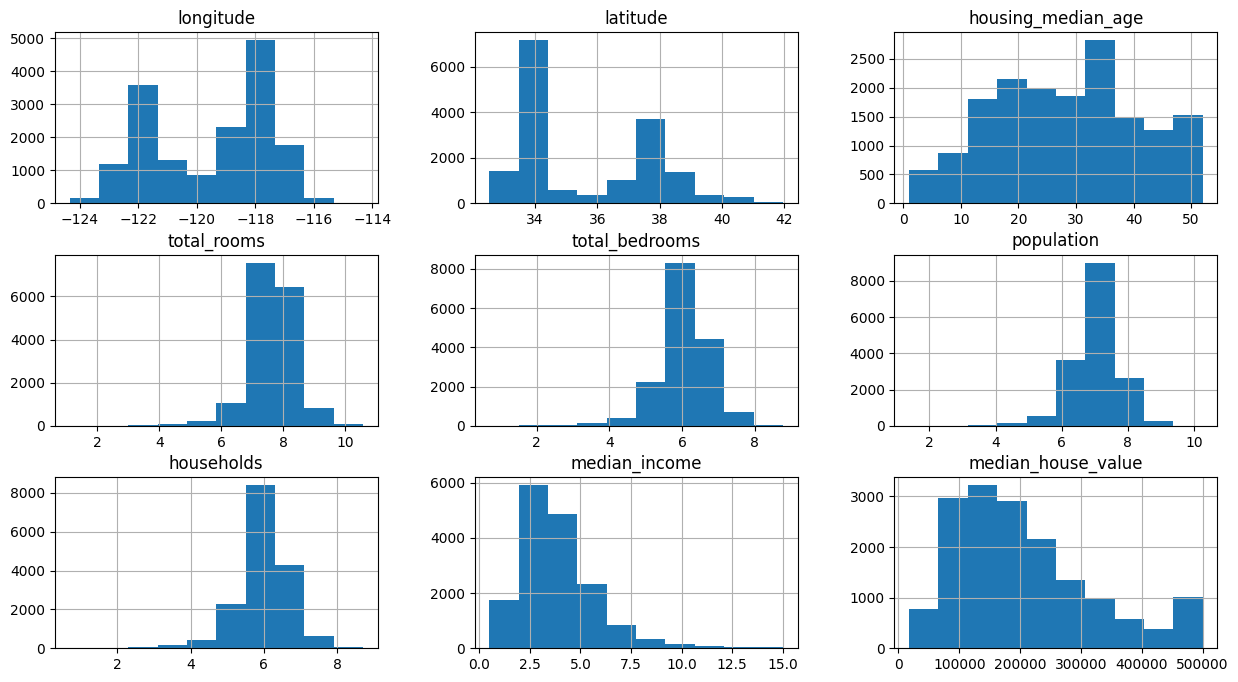

In [56]:
train_data.hist(figsize = (15,8))

In [57]:
# one hot encoding (categorical features)

train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis = 1)


<Axes: >

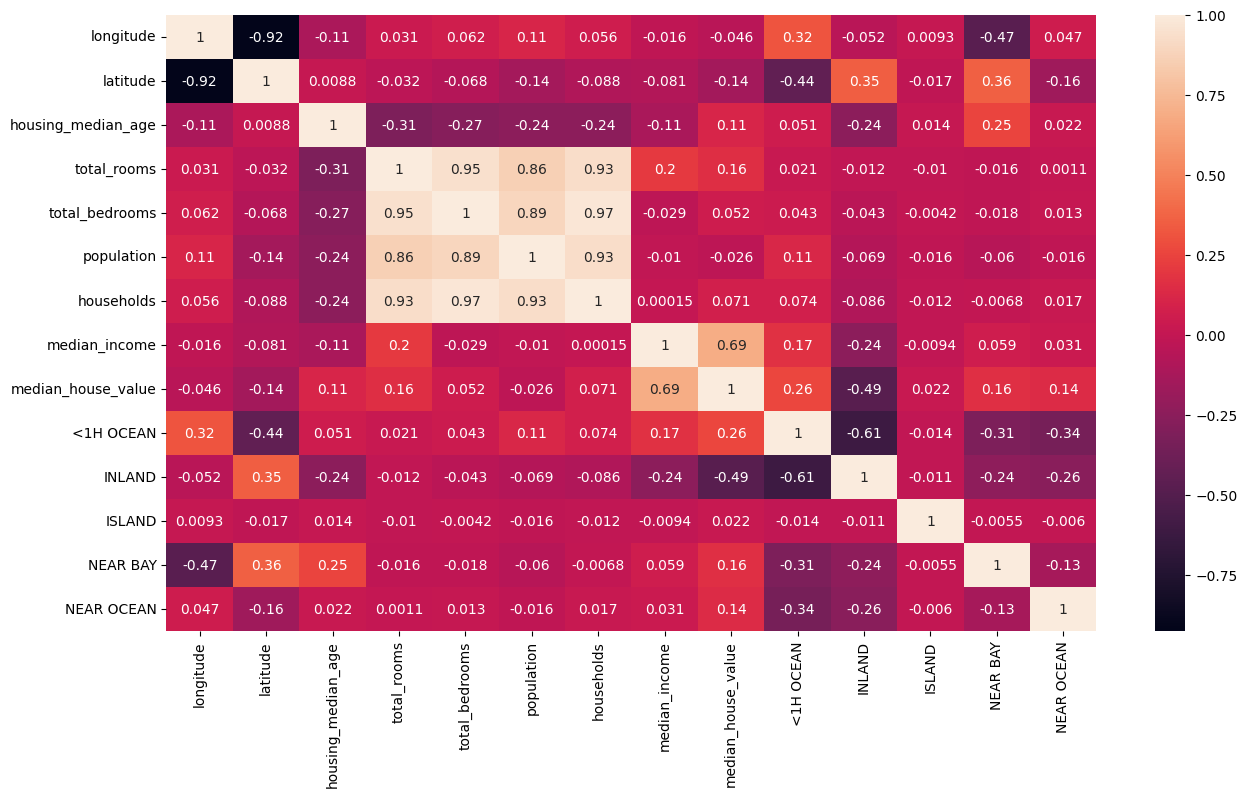

In [58]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot = True)

<Axes: xlabel='latitude', ylabel='longitude'>

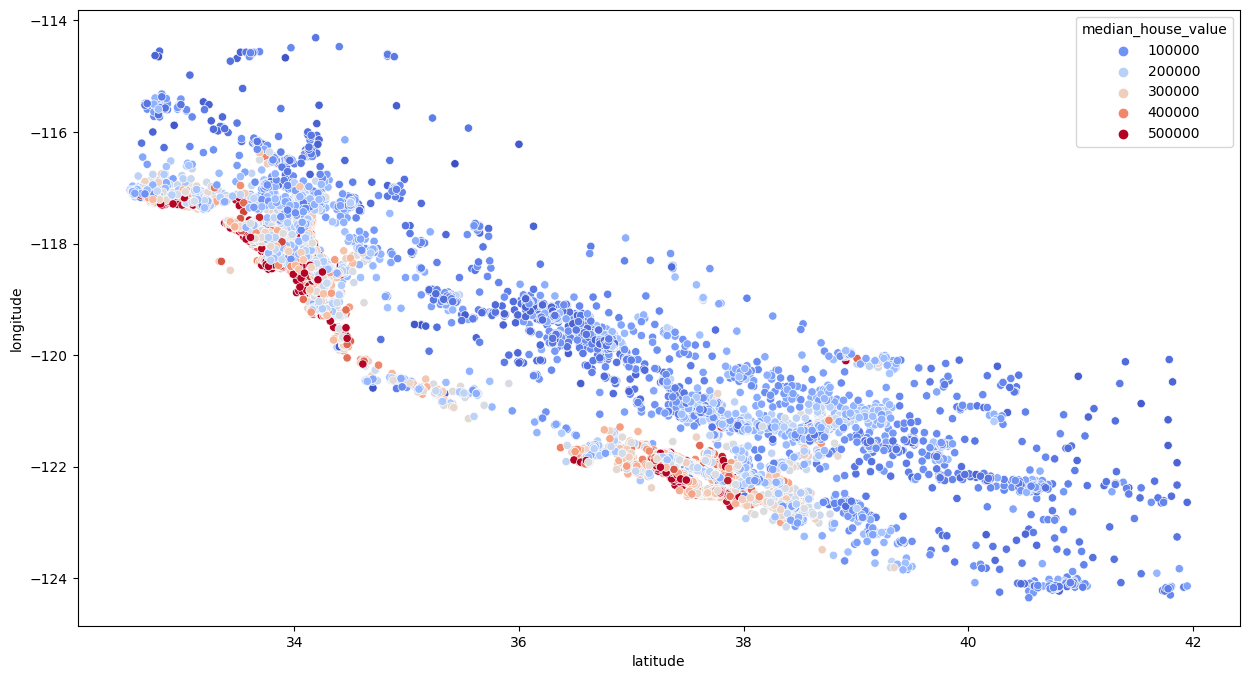

In [59]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude', y= "longitude", data = train_data , hue = 'median_house_value', palette="coolwarm")

# Feature Engineering

In [60]:
train_data['bedroom_ratio'] = train_data['total_bedrooms']/ train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

<Axes: >

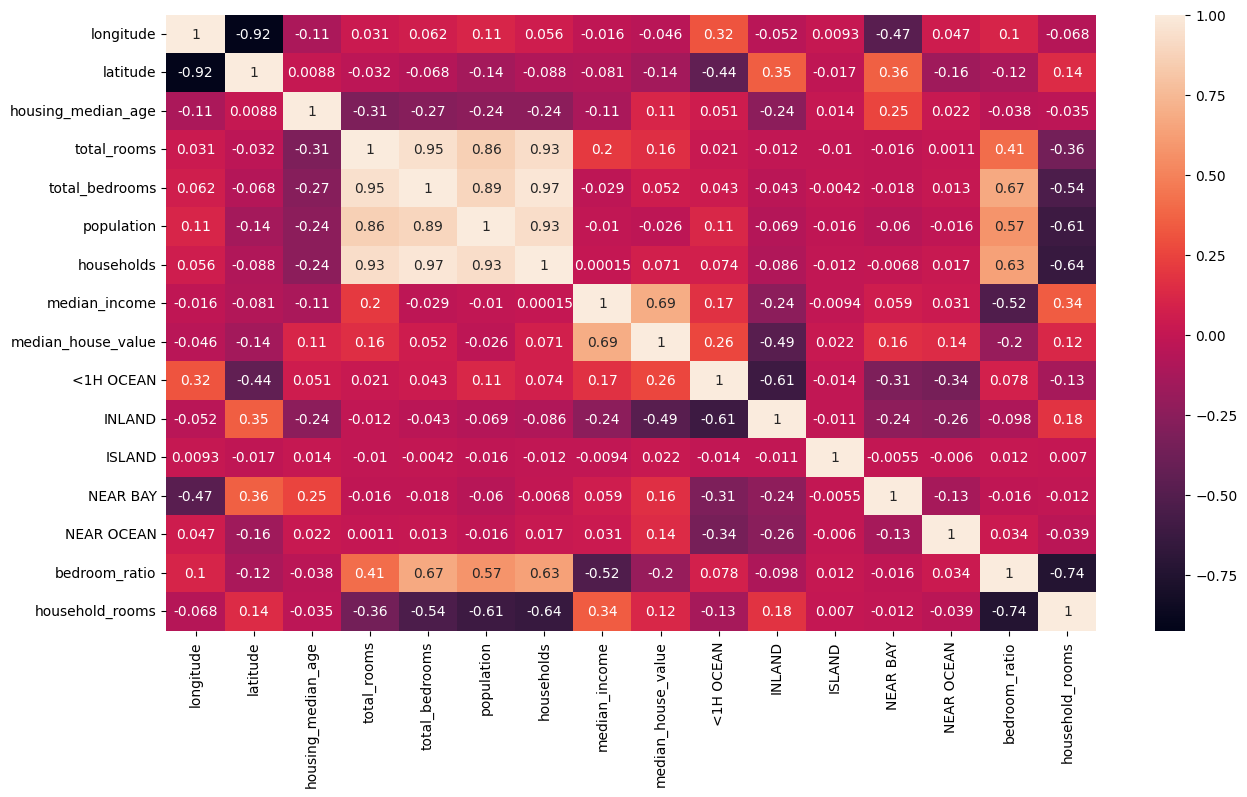

In [61]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot = True)

# Linear Regression Model

In [69]:
from sklearn.linear_model import LinearRegression

scalar = StandardScaler()

x_train, y_train = train_data.drop(['median_house_value'], axis = 1), train_data['median_house_value']
x_train_s = scalar.fit_transform(x_train)

model = LinearRegression()

model.fit(x_train_s,y_train)

LinearRegression()

In [ ]:
test_data = x_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms']+ 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms']+ 1)
test_data['population'] = np.log(test_data['population']+ 1)
test_data['households'] = np.log(test_data['households']+ 1)


test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis = 1)

test_data['bedroom_ratio'] = test_data['total_bedrooms']/ test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms']/ test_data['households']


In [66]:
x_test, y_test = test_data.drop(['median_house_value'], axis = 1), test_data['median_house_value']

In [73]:
x_test_s =scalar.transform(x_test)

In [74]:
model.score(x_test_s,y_test) 

0.6805487522944984

# Random Forest Model

In [78]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(x_train_s, y_train)

RandomForestRegressor()

In [79]:
forest.score(x_test_s,y_test)

0.8156550818514698

# Comparison of the models

In [88]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    "n_estimators": [100,200,300],
    "max_features": [2,4,6,8],
    "min_samples_split":[2,4],
    "max_depth":[None,2,4]
}
grid_search =  GridSearchCV(forest, param_grid, cv= 5, scoring = "neg_mean_squared_error", return_train_score = True)

grid_search.fit(x_train_s, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 2, 4],
                         'max_features': [2, 4, 6, 8],
                         'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [89]:
best_model = grid_search.best_estimator_

In [90]:
grid_search.best_estimator_.score(x_test_s, y_test)

0.8203312270902701